In this notebook I show how to train the top layer of a network during the transfer learning process. I have created some dummy modules that will need to be substituted as soon as the real modules of the projects are implemented (balanced batch generator, train test split etc.)

In [1]:
import sys
import os
sys.path.insert(0,os.path.join('..','scripts'))
from network import Network, Temp
import keras
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/vgarciacazorla/virtual_envs/1v/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We load the architecture of the network Xception with its weights. The method adapts that architecture to our problem (3 classes). Moreover, it freezes all the pretrained layers with the aim of first training only the newly added layers (actual fine tuning will happen in later steps)

In [2]:
network = Network(pretrained_arch = 'xception')
network.freeze_all_pretrained_layers()

Original Imagenet weights for network xception loaded
135 total layers ( 132 pretrained and 3 new stacked on top)


Assingn the generators. I created a dummy temporal version to be able to run my code until the real generators are implemented. I manually splitted a train and val set (put them in separate folders). The generators read from these dirs, recale to 150x150 and apply some augmentation.

In [3]:
train_generator, val_generator = Temp().get_dummy_generators()

Found 1201 images belonging to 3 classes.
Found 280 images belonging to 3 classes.


Sample the generator to see what is going to feed

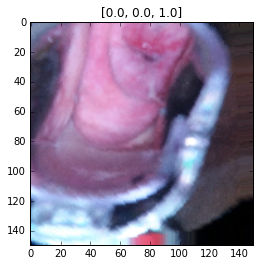

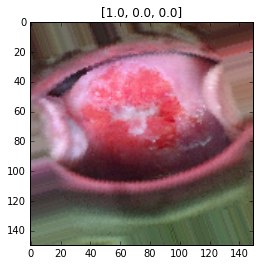

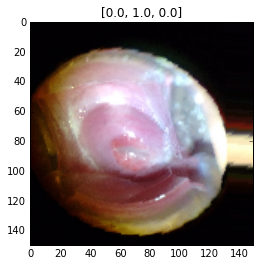

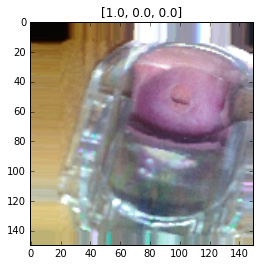

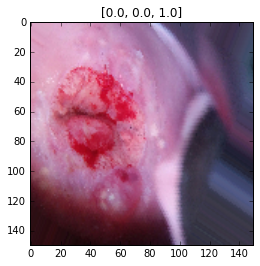

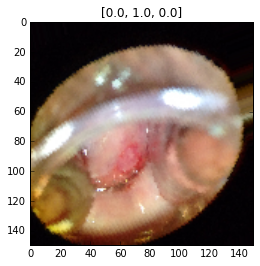

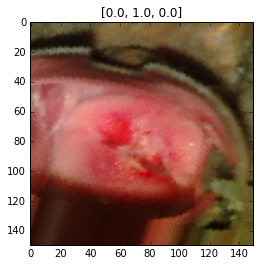

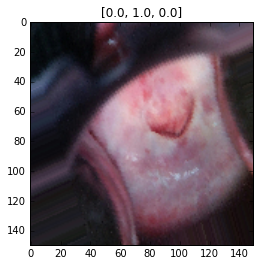

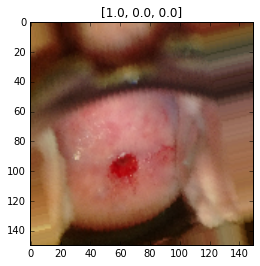

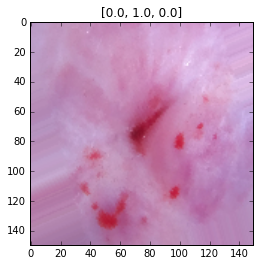

In [4]:
for x,y in train_generator:
    break
for i in range(10):
    plt.figure()
    plt.imshow(x[i])
    plt.title(str(list(y[i])))
    plt.show()

Set the dummy generators that will feed the network and compile

In [6]:
network.set_train_val_generators(train_generator, val_generator)
network.compile(finetuning = False)

Train. The output is too verbose for a notebook. Better run all this code in a separate script.

In [5]:

network.train(epochs = 100, batch_size = 32, weights_name = 'top')

( 3 ) trainable layers: from 132 to 134
( 132 ) non-trainable layers: from 0 to 131
INFO:tensorflow:Summary name block1_conv1/kernel:0 is illegal; using block1_conv1/kernel_0 instead.
INFO:tensorflow:Summary name block1_conv1/kernel:0 is illegal; using block1_conv1/kernel_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/gamma:0 is illegal; using block1_conv1_bn/gamma_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/gamma:0 is illegal; using block1_conv1_bn/gamma_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/beta:0 is illegal; using block1_conv1_bn/beta_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/beta:0 is illegal; using block1_conv1_bn/beta_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/moving_mean:0 is illegal; using block1_conv1_bn/moving_mean_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/moving_mean:0 is illegal; using block1_conv1_bn/moving_mean_0 instead.
INFO:tensorflow:Summary name block1_conv1_bn/moving_variance:0 is illega

KeyboardInterrupt: 